# Multidimensional Kernel Density Estimates (KDEs):

This notebook is for people to familiarize themselves with the visualization of multidimensional KDEs. The example datasets are randomly generated sets of 2d (i.e., (y,x)) or 3d (i.e., (z,y,x)) points (pythonic order of dimensions).

In [1]:
from __future__ import division, print_function
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def two_var_kde(x, y, sampling = 100j):
    
    xmin, xmax = (np.amin(x), np.amax(x))
    ymin, ymax = (np.amin(y), np.amax(y))
    
    xx, yy = np.mgrid[xmin:xmax:sampling, ymin:ymax:sampling]
    
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kernel = st.gaussian_kde(np.vstack((x,y)))
    
    f = np.reshape(kernel(positions).T, xx.shape)
    f_rescale = (f - np.amin(f)/(np.amax(f) - np.amin(f)))
    
    return xx, yy, f, f_rescale

In [9]:
def plot_2d_kde(xx, yy, f_rescale, axis_lims, cmap = 'Purples', line_col = 'k', figsize = (3,3), save_path = os.getcwd()):
    
    
    xmin, xmax, ymin, ymax = axis_lims
    
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    cfset = ax.contourf(xx, yy, f_rescale, cmap='Purples')
    cset = ax.contour(xx, yy, f_rescale, colors='k')
    
    # Label plot
    ax.clabel(cset, inline=1, fontsize=12)
    ax.set_xlabel('$x$ (px)', fontsize = 12)
    plt.xticks(fontsize = 12)
    ax.set_ylabel('$y$ (px)', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    
    plt.savefig(os.path.join(save_path, '2d_kde_plot.svg')) # include a time stamp
    plt.show()
    
    return

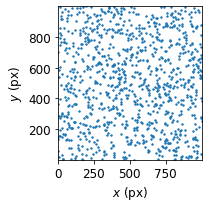

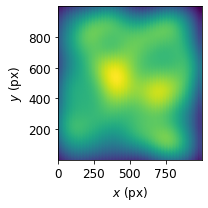

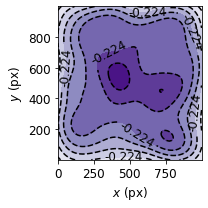

In [15]:
# generate random data

x = np.random.randint(0,1000, size = (1000))
y = np.random.randint(0,1000, size = (1000))

# pull out axis limits for plotting results

xmin, xmax = (np.amin(x), np.amax(x))
ymin, ymax = (np.amin(y), np.amax(y))
axis_lims = (xmin, xmax, ymin, ymax)

# visualize input

plt.figure(figsize = (3,3))
plt.scatter(x,y, s = 2)

plt.xlabel('$x$ (px)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(xmin, xmax)

plt.ylabel('$y$ (px)', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

# calculate and return 2d kde

xx, yy, f, f_rescale = two_var_kde(x, y)

# plot kde values of entire field of view

plt.figure(figsize = (3,3))
plt.scatter(xx, yy, c=f_rescale)

plt.xlabel('$x$ (px)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(xmin, xmax)

plt.ylabel('$y$ (px)', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(ymin, ymax)
plt.tight_layout()
plt.show()

# plot results with contours

plot_2d_kde(xx, yy, f_rescale, axis_lims)